In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Carregar o dataset
file_path = './Datasets/20241016 Gym Members Exercise Dataset/gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
# Para aplicar o K-means, serão selecionadas as colunas numéricas relevantes. 
# Será realizada a seleção e, em seguida, rodar o algoritmo para um intervalo de clusters de 2 a 20.
# Seleção das colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

In [6]:
# Padronização dos dados para melhorar o desempenho do K-means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [24]:
# Configuração do intervalo de clusters
k_range = range(2, 21)
inertia_values = []

In [26]:
# 4. Executar o K-means para cada valor de k e calcular o SSE
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)  # Configurar o modelo com k clusters
    kmeans.fit(data_scaled)  # Ajustar o modelo aos dados escalados
    inertia_values.append(kmeans.inertia_)  # Armazenar o SSE (inércia) para o k atual

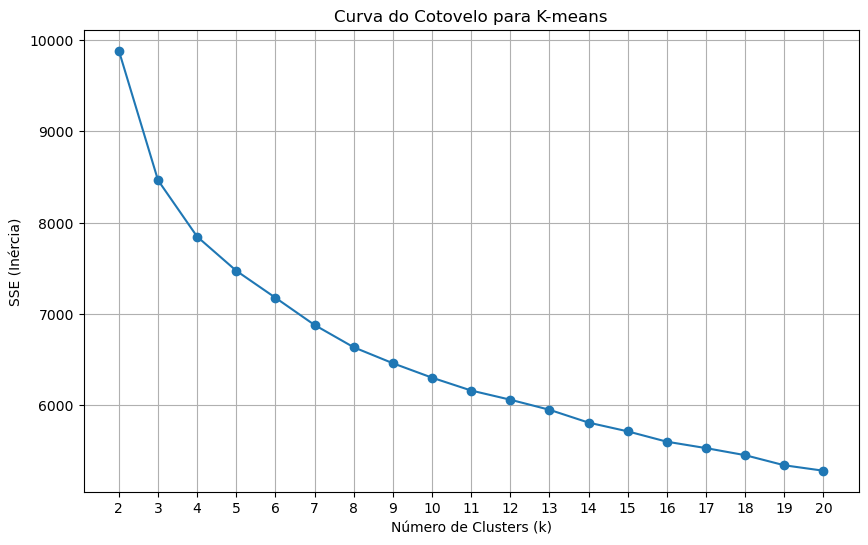

In [28]:
# Gerar o gráfico da curva do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE (Inércia)')
plt.title('Curva do Cotovelo para K-means')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [30]:
# Analisando os valores de inércia e visualizando o ponto de cotovelo com uma abordagem mais quantitativa
# para identificar o ponto onde a redução da inércia se estabiliza

# Calculando as diferenças entre cada ponto de inércia consecutivo para observar a taxa de mudança
differences = np.diff(inertia_values)

# Para observar o ponto em que a mudança começa a diminuir, vamos buscar o maior decréscimo seguido de reduções menores
elbow_point = np.argmin(differences) + 2  # Ajustando o índice para coincidir com o valor de k (2 é o ponto inicial)

elbow_point

2

In [ ]:
# O número ideal de clusters identificado pela análise quantitativa é 2. 
# Esse valor representa o ponto em que a redução no SSE (inércia) começa a desacelerar significativamente.

In [32]:
# 5. Fazer uma analise sobre a distribuição dos dados a partir dos agrupamentos gerados. 
# Verificar se o treinamento detectou algum padrão nos grupos. Em caso positivo, 
# descrever os padrões encontrados em cada grupo por meio dos dados mais representativos.
numeric_data = data.select_dtypes(include=[np.number])


In [34]:
# Padronizar os dados para normalizar as variáveis
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [36]:
# Aplicar o K-means com o número ideal de clusters encontrado anteriormente (n_clusters=2)
kmeans = KMeans(n_clusters=2, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)  # Adiciona a coluna 'Cluster' ao dataset original com o rótulo de cada grupo


In [42]:
# Calcular as médias das variáveis para cada cluster
# Isso nos permite identificar características representativas de cada grupo
numeric_columns = data.select_dtypes(include=[np.number]).columns
cluster_means = data[numeric_columns].groupby(data['Cluster']).mean()
# Exibir as médias para cada cluster
print("Médias das variáveis em cada Cluster:\n", cluster_means)

Médias das variáveis em cada Cluster:
                Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Cluster                                                               
0        37.944444    74.214141    1.725909  180.207071  143.792929   
1        38.872258    73.762839    1.721729  179.801290  143.760000   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Cluster                                                           
0          62.540404                  1.746263      1263.469697   
1          62.141935                  1.131277       813.947097   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
Cluster                                                                         
0             15.051010               3.122222                       4.515152   
1             27.512645               2.500000                       3.016774   

         Experience_Level        BMI  Cluster  
Cluster                           

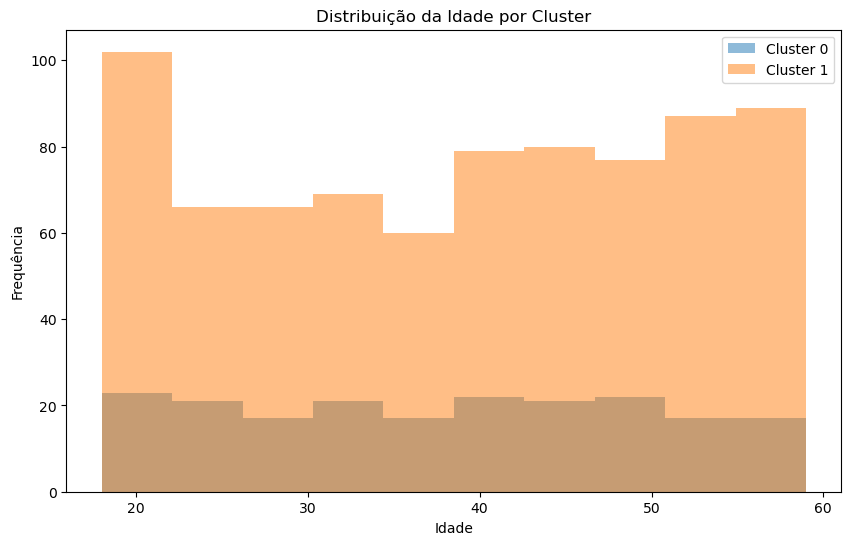

In [44]:
# Análise detalhada dos clusters
# Exemplo de um gráfico para ver a distribuição de uma variável nos clusters (Age)
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.hist(data[data['Cluster'] == cluster]['Age'], alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade por Cluster')
plt.legend()
plt.show()